In [1]:
import pandas as pd
import numpy as np
import duckdb, sqlalchemy
import seaborn
from matplotlib import pyplot

In [2]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

# Facet example: avocado prices

In [3]:
avocados_df = pd.read_csv("avocado.csv")

avocados_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [1]:
avocados_df.dtype

NameError: name 'avocados_df' is not defined

In [6]:
%sql SELECT COUNT(*) FROM avocados_df

,count_star()
0,18249


In [9]:
%sql SELECT year, COUNT(*) AS total_rows_per_year FROM avocados_df GROUP BY year

,year,total_rows_per_year
0,2015,5615
1,2016,5616
2,2017,5722
3,2018,1296


In [10]:
%sql SELECT year, AVG(AveragePrice) FROM avocados_df GROUP BY year

,year,"avg(""AveragePrice"")"
0,2015,1.375590
1,2016,1.338640
2,2017,1.515128
3,2018,1.347531


In [11]:
%sql SELECT region, AVG(AveragePrice) AS region_price \
FROM avocados_df GROUP BY region ORDER BY region_price DESC LIMIT 10

,region,region_price
0,HartfordSpringfield,1.818639
1,SanFrancisco,1.804201
2,NewYork,1.727574
3,Philadelphia,1.632130
4,Sacramento,1.621568
5,Charlotte,1.606036
6,Northeast,1.601923
7,Albany,1.561036
8,Chicago,1.556775
9,RaleighGreensboro,1.555118


In [12]:
%sql SELECT region, AVG(AveragePrice) AS region_price, \
STDDEV(AveragePrice) AS region_std \
FROM avocados_df GROUP BY region ORDER BY region_std DESC LIMIT 10

,region,region_price,region_std
0,SanFrancisco,1.804201,0.565371
1,PhoenixTucson,1.224438,0.548283
2,WestTexNewMexico,1.261701,0.497107
3,Spokane,1.445592,0.485965
4,LasVegas,1.380917,0.473968
5,Seattle,1.442574,0.472787
6,HartfordSpringfield,1.818639,0.468989
7,Portland,1.317722,0.464029
8,Boise,1.348136,0.457911
9,SanDiego,1.398166,0.456451


In [13]:
%sql region_mean_sd << SELECT region, AVG(AveragePrice) AS region_price, STDDEV(AveragePrice) AS region_std \
FROM avocados_df GROUP BY region

Returning data to local variable region_mean_sd


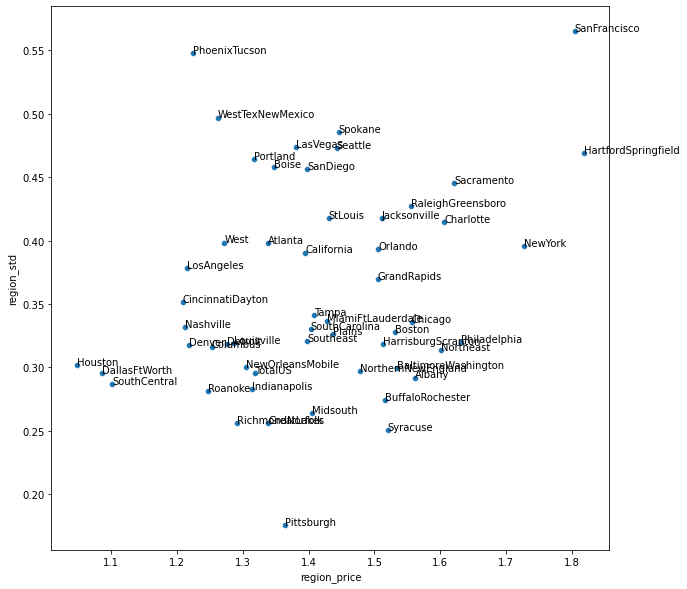

In [14]:
pyplot.figure(figsize=(10,10))

seaborn.scatterplot(x="region_price", y="region_std", data=region_mean_sd)
for i, row in region_mean_sd.iterrows():
    pyplot.text(x=row["region_price"], y=row["region_std"], s=row["region"])

In [16]:
%sql regions_df << SELECT * FROM avocados_df \
WHERE region IN ('Boston', 'Syracuse', 'LosAngeles', 'SanFrancisco')

Returning data to local variable regions_df


In [17]:
regions_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.13,450816.39,3886.27,346964.70,13952.56,86012.86,85913.60,99.26,0.0,conventional,2015,Boston
1,1,2015-12-20,1.07,489802.88,4912.37,390100.99,5887.72,88901.80,88768.47,133.33,0.0,conventional,2015,Boston
2,2,2015-12-13,1.01,549945.76,4641.02,455362.38,219.40,89722.96,89523.38,199.58,0.0,conventional,2015,Boston
3,3,2015-12-06,1.02,488679.31,5126.32,407520.22,142.99,75889.78,75666.22,223.56,0.0,conventional,2015,Boston
4,4,2015-11-29,1.19,350559.81,3609.25,272719.08,105.86,74125.62,73864.52,261.10,0.0,conventional,2015,Boston


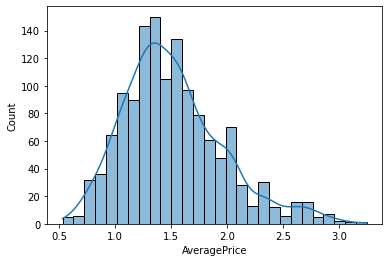

In [19]:
seaborn.histplot(x="AveragePrice", data=regions_df, kde=True)
pyplot.show()

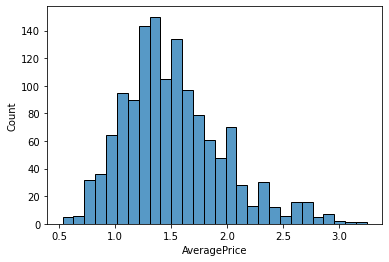

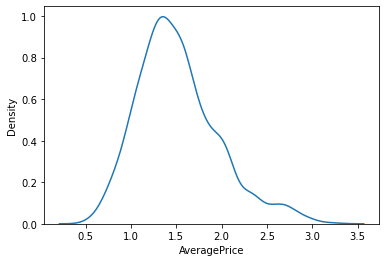

In [24]:
seaborn.histplot(x="AveragePrice", data=regions_df)
pyplot.show()
seaborn.kdeplot(x="AveragePrice", data=regions_df)
pyplot.show()

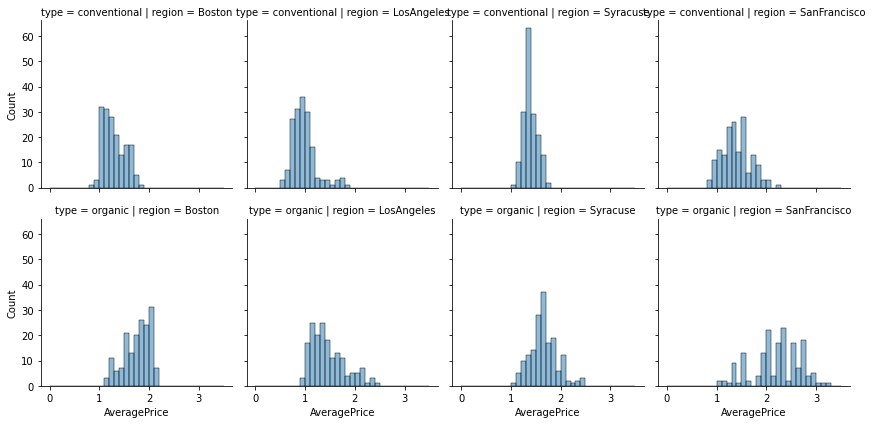

In [21]:
grid = seaborn.FacetGrid(col="region", row="type", data=regions_df)
grid.map_dataframe(seaborn.histplot, x="AveragePrice", hue="type", binwidth=0.1, binrange=(0,3.5))

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

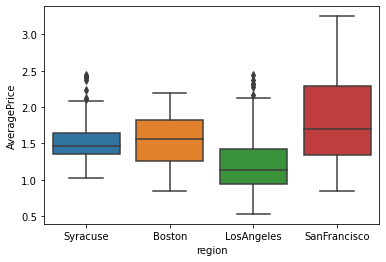

In [25]:
region_order = ["Syracuse", "Boston", "LosAngeles", "SanFrancisco"]
seaborn.boxplot(y="AveragePrice", x="region", order=region_order, data=regions_df)

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

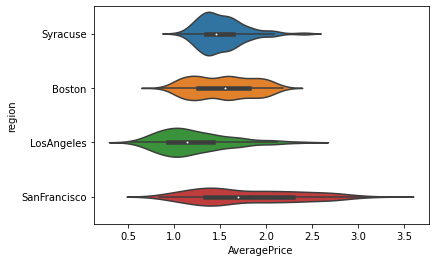

In [26]:
region_order = ["Syracuse", "Boston", "LosAngeles", "SanFrancisco"]
seaborn.violinplot(x="AveragePrice", y="region", order=region_order, data=regions_df)

# JOIN example (county data)

In [30]:
county_classifications = pd.read_csv("Release23_June2021/County Classifications.csv",
                                     delimiter="\t", encoding="LATIN-1")
county_population = pd.read_csv("Release23_June2021/People.csv")

In [31]:
county_classifications.head()

,FIPStxt,State,County,RuralUrbanContinuumCode2013,UrbanInfluenceCode2013,RuralUrbanContinuumCode2003,UrbanInfluenceCode2003,Metro2013,Nonmetro2013,Micropolitan2013,...,FarmDependent2003,ManufacturingDependent2000,LowEducation2000,RetirementDestination2000,PersistentPoverty2000,Noncore2013,Type_2015_Nonspecialized_NO,Metro_Adjacent2013,PersistentChildPoverty2004,RecreationDependent2000
0,1001,AL,Autauga,2.0,2.0,2.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1003,AL,Baldwin,3.0,2.0,4.0,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1005,AL,Barbour,6.0,6.0,6.0,6.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,1007,AL,Bibb,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1009,AL,Blount,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
county_classifications.dtypes

FIPStxt                                 int64
State                                  object
County                                 object
RuralUrbanContinuumCode2013           float64
UrbanInfluenceCode2013                float64
RuralUrbanContinuumCode2003           float64
UrbanInfluenceCode2003                float64
Metro2013                             float64
Nonmetro2013                          float64
Micropolitan2013                      float64
Type_2015_Update                      float64
Type_2015_Farming_NO                  float64
Type_2015_Manufacturing_NO            float64
Type_2015_Mining_NO                   float64
Type_2015_Government_NO               float64
Type_2015_Recreation_NO               float64
Low_Education_2015_update             float64
Low_Employment_2015_update            float64
Population_loss_2015_update           float64
Retirement_Destination_2015_Update    float64
Perpov_1980_0711                      float64
PersistentChildPoverty_1980_2011  

In [33]:
county_population.head()

,FIPS,State,County,PopChangeRate1819,PopChangeRate1019,TotalPopEst2019,NetMigrationRate1019,NaturalChangeRate1019,Net_International_Migration_Rate_2010_2019,PopChangeRate0010,...,TotalPopEst2014,TotalPopEst2011,Net_International_Migration_2010_2019,NaturalChange1019,TotalPopEst2015,TotalPopEst2016,TotalPopEst2017,NetMigration1019,TotalPopEst2018,TotalPopEstBase2010
0,0,US,United States,0.475,6.116,328239523,2.485,3.631,2.485,9.71,...,318301008,311556874,7685444.0,11232413.0,320635163,322941311,324985539,7685444.0,326687501,308758105
1,1000,AL,Alabama,0.317,2.461,4903185,1.059,1.402,0.809,7.48,...,4841799,4799069,38731.0,67083.0,4852347,4863525,4874486,50665.0,4887681,4780125
2,1001,AL,Autauga,0.605,2.001,55869,0.686,1.315,-0.029,24.96,...,54893,55227,-16.0,720.0,54864,55243,55390,376.0,55533,54597
3,1003,AL,Baldwin,2.469,21.911,223234,21.001,0.910,0.714,29.80,...,199183,186558,1307.0,1667.0,202939,207601,212521,38455.0,217855,182265
4,1005,AL,Barbour,-0.748,-9.664,24686,-8.797,-0.867,0.161,-5.44,...,26755,27341,44.0,-237.0,26283,25806,25157,-2404.0,24872,27455


In [34]:
county_population.dtypes

FIPS                     int64
State                   object
County                  object
PopChangeRate1819      float64
PopChangeRate1019      float64
                        ...   
TotalPopEst2016          int64
TotalPopEst2017          int64
NetMigration1019       float64
TotalPopEst2018          int64
TotalPopEstBase2010      int64
Length: 91, dtype: object

In [35]:
%sql SELECT c.FIPStxt, c.State, c.County, c.RuralUrbanContinuumCode2013, p.PopChangeRate1019 \
FROM county_classifications c, county_population p \
WHERE c.FIPStxt = p.FIPS

,FIPStxt,State,County,RuralUrbanContinuumCode2013,PopChangeRate1019
0,1001,AL,Autauga,2.0,2.001
1,1003,AL,Baldwin,3.0,21.911
2,1005,AL,Barbour,6.0,-9.664
3,1007,AL,Bibb,1.0,-2.081
4,1009,AL,Blount,1.0,0.784
...,...,...,...,...,...
3215,72145,PR,Vega Baja,1.0,-16.015
3216,72147,PR,Vieques,7.0,-9.963
3217,72149,PR,Villalba,2.0,-17.803
3218,72151,PR,Yabucoa,1.0,-14.765


In [36]:
%sql county_df << SELECT c.FIPStxt, c.State, c.County, c.RuralUrbanContinuumCode2013, p.PopChangeRate1019 \
FROM county_classifications c, county_population p \
WHERE c.FIPStxt = p.FIPS

Returning data to local variable county_df


In [37]:
county_df.head()

,FIPStxt,State,County,RuralUrbanContinuumCode2013,PopChangeRate1019
0,1001,AL,Autauga,2.0,2.001
1,1003,AL,Baldwin,3.0,21.911
2,1005,AL,Barbour,6.0,-9.664
3,1007,AL,Bibb,1.0,-2.081
4,1009,AL,Blount,1.0,0.784


In [38]:
%sql SELECT State, County, PopChangeRate1019 FROM county_df ORDER BY PopChangeRate1019 DESC

,State,County,PopChangeRate1019
0,ND,McKenzie,134.311
1,TX,Loving,101.190
2,ND,Williams,66.404
3,TX,Hays,45.493
4,UT,Wasatch,44.185
...,...,...,...
3215,PR,Guánica,-20.587
3216,PR,Lares,-20.781
3217,TX,Terrell,-23.244
3218,IL,Alexander,-29.795


In [39]:
%sql SELECT State, County, PopChangeRate1019, RuralUrbanContinuumCode2013 \
FROM county_df ORDER BY RuralUrbanContinuumCode2013 DESC, PopChangeRate1019 DESC LIMIT 20

,State,County,PopChangeRate1019,RuralUrbanContinuumCode2013
0,ND,McKenzie,134.311,9.0
1,TX,Loving,101.190,9.0
2,ND,Mountrail,36.806,9.0
3,ND,Dunn,25.113,9.0
4,AK,Skagway,22.211,9.0
5,ID,Teton,19.614,9.0
6,ND,Billings,18.519,9.0
7,GA,Union,14.698,9.0
8,GA,Towns,14.257,9.0
9,MT,Madison,11.746,9.0


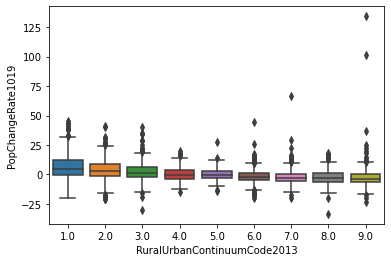

In [41]:
seaborn.boxplot(x="RuralUrbanContinuumCode2013", y="PopChangeRate1019", data=county_df)
#pyplot.ylim(-50, 50)
pyplot.show()